# Add/Expiration Count Analysis

This notebook contains code for plotting the number of new and expired certificates, names, or sites found over time by Censys and CT, as well as the overlap between the two. If you are interested in generating these plots by a script, then I recommend using the script that is (or will be) provided in this repository. (This notebook contains a more detailed walkthrough of what the script actually does, and is included here in the spirit of transparency.)

In [107]:
# Imports
import collections
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

We begin by specifying relevant directories in this project that we will access. To keep this cross-platform, we use the `os.path` module. This means we have to do some weirdness to get the directories we need, but whatever.

In [108]:
# We run the notebook in this directory, so everything is relative to that.
NOTEBOOK_DIR = os.path.abspath(os.path.curdir)

# The analysis directory is the parent of the notebook directory.
ANALYSIS_DIR = os.path.dirname(NOTEBOOK_DIR)

# The data directory is where the CSV tables are stored, while the figure
# directory is where the output figures are saved.
DATA_SUBDIR = os.path.join(ANALYSIS_DIR, 'data')
FIG_SUBDIR = os.path.join(ANALYSIS_DIR, 'fig')

Now we can specify (and then construct) the path to the relevant filenames.

A quick note on the formatting of these input files: they must be CSV files with four columns, `obs_date` (date strings in the form `YYYY-MM-DD`, `censys_certs`, `ct_certs`, and `combined_certs` (integers representing the count of unique certificates in Censys, CT, and their intersection, respectively). Note that since we will later access these columns by name, the only restriction on the table format is that `obs_date` must be the leftmost column.

In [109]:
NEW_CERTS_PATH = os.path.join(DATA_SUBDIR, 'all_cert_new_count_20180726_copy2.csv')
EXP_CERTS_PATH = os.path.join(DATA_SUBDIR, 'all_cert_expired_count_20180726_copy2.csv')

Next, we read these files into data frames and separate out the columns.

In [117]:
new_certs = pd.read_csv(NEW_CERTS_PATH, header=0, index_col=0, parse_dates=True)
new_dates = new_certs.index
new_censys = new_certs.loc[:, 'censys_certs']
new_ct = new_certs.loc[:, 'ct_certs']
new_combined = new_certs.loc[:, 'combined_certs']

exp_certs = pd.read_csv(EXP_CERTS_PATH, header=0, index_col=0, parse_dates=True)
exp_dates = exp_certs.index
exp_censys = exp_certs.loc[:, 'censys_certs']
exp_ct = exp_certs.loc[:, 'ct_certs']
exp_combined = exp_certs.loc[:, 'combined_certs']

Now we create an empty figure and axes to plot on.

'\nfor i, label in enumerate(ax.xaxis.get_ticklabels()):\n    if i % 2 == 1:\n        label.set_visible(False)\n'

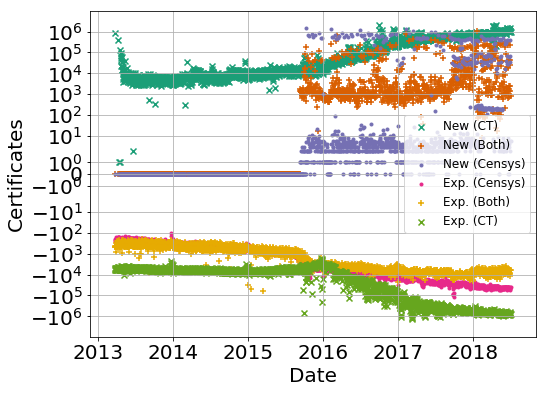

In [145]:
# Create a figure with the specified size
WIDTH = 8
HEIGHT = 6
fig = plt.figure(figsize=(WIDTH, HEIGHT))

# Create the plot
# These colors are taken from a colorblind-friendly scheme
# (http://jfly.iam.u-tokyo.ac.jp/color/#see)
NEW_CT_COLOR = '#d1e5f0'
NEW_COMBINED_COLOR = '#67a9cf'
NEW_CENSYS_COLOR='#2166ac'
EXP_CT_COLOR = '#fddbc7'
EXP_COMBINED_COLOR = '#ef8a62'
EXP_CENSYS_COLOR = '#b2182b'

NEW_CT_COLOR = '#1b9e77'
NEW_COMBINED_COLOR = '#d95f02'
NEW_CENSYS_COLOR='#7570b3'
EXP_CT_COLOR = '#66a61e'
EXP_COMBINED_COLOR = '#e6ab02'
EXP_CENSYS_COLOR = '#e7298a'

CT_MARKER = 'x'
COMBINED_MARKER = '+'
CENSYS_MARKER = '.'

ax = plt.axes()
ax.set_yscale('symlog')
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
'''
ax.fill_between(new_dates, 0, new_ct, facecolor=NEW_CT_COLOR)
ax.fill_between(new_dates, new_ct, new_ct + new_combined,
                facecolor=NEW_COMBINED_COLOR)
ax.fill_between(new_dates, new_ct + new_combined,
                new_ct + new_combined + new_censys,
                facecolor=NEW_CENSYS_COLOR)

ax.fill_between(exp_dates, -exp_ct + exp_combined, 0,
                facecolor=EXP_CT_COLOR)
ax.fill_between(exp_dates, -exp_ct, -exp_ct + exp_combined,
                facecolor=EXP_COMBINED_COLOR)
ax.fill_between(exp_dates, -exp_ct - exp_censys + exp_combined,
                -exp_ct, facecolor=EXP_CENSYS_COLOR)
'''
def mjf(ax, frame, limit, marker, color, label):
    copy = frame.copy()
    filter_frame = copy[abs(copy) > limit]
    ax.scatter(filter_frame.index, filter_frame, marker=marker, color=color, label=label)

MIN_COUNT = -1
mjf(ax, new_ct, MIN_COUNT, CT_MARKER, NEW_CT_COLOR, 'New (CT)')
mjf(ax, new_combined, MIN_COUNT, COMBINED_MARKER, NEW_COMBINED_COLOR, 'New (Both)')
mjf(ax, new_censys, MIN_COUNT, CENSYS_MARKER, NEW_CENSYS_COLOR, 'New (Censys)')
mjf(ax, -exp_combined, MIN_COUNT, CENSYS_MARKER, EXP_CENSYS_COLOR, 'Exp. (Censys)')
mjf(ax, -exp_censys + exp_combined, MIN_COUNT, COMBINED_MARKER, EXP_COMBINED_COLOR, 'Exp. (Both)')
mjf(ax, -exp_ct + exp_combined, MIN_COUNT, CT_MARKER, EXP_CT_COLOR, 'Exp. (CT)')

'''
ax.scatter(new_dates, new_ct, marker=CT_MARKER, color=NEW_CT_COLOR)
ax.scatter(new_dates, new_combined, marker=COMBINED_MARKER, color=NEW_COMBINED_COLOR)
ax.scatter(new_dates, new_censys, marker=CENSYS_MARKER, color=NEW_CENSYS_COLOR)
ax.scatter(exp_dates, -exp_ct + exp_combined, marker=CT_MARKER, color=EXP_CT_COLOR)
ax.scatter(exp_dates, -exp_combined, marker=COMBINED_MARKER, color=EXP_COMBINED_COLOR)
ax.scatter(exp_dates, -exp_censys + exp_combined, marker=CENSYS_MARKER, color=EXP_CENSYS_COLOR)
'''
ax.set_xlabel('Date')
ax.set_ylabel('Certificates')
ax.grid(True)

# Make the legend
LINE_WIDTH = 4
LOCATION = 2  # Upper left
ax.legend(ncol=1, fontsize=12)
'''
custom_lines = [
    matplotlib.lines.Line2D([0], [0], color=NEW_CENSYS_COLOR, lw=LINE_WIDTH),
    matplotlib.lines.Line2D([0], [0], color=NEW_COMBINED_COLOR, lw=LINE_WIDTH),
    matplotlib.lines.Line2D([0], [0], color=NEW_CT_COLOR, lw=LINE_WIDTH),
    matplotlib.lines.Line2D([0], [0], color=EXP_CT_COLOR, lw=LINE_WIDTH),
    matplotlib.lines.Line2D([0], [0], color=EXP_COMBINED_COLOR, lw=LINE_WIDTH),
    matplotlib.lines.Line2D([0], [0], color=EXP_CENSYS_COLOR, lw=LINE_WIDTH),
]
ax.legend(custom_lines, [
    'Added (Censys)', 'Added (Both)', 'Added (CT)',
    'Expired (CT)', 'Expired (Both)', 'Expired (Censys)',
], loc=LOCATION)
'''

# Update font sizes
FONT_SIZE=20
matplotlib.rcParams.update({'font.size': FONT_SIZE})
'''
for i, label in enumerate(ax.xaxis.get_ticklabels()):
    if i % 2 == 1:
        label.set_visible(False)
'''

In [146]:
OUT_FILE = os.path.join(FIG_SUBDIR, 'cert_add_exp.pdf')
fig.savefig(OUT_FILE, bbox_inches='tight')

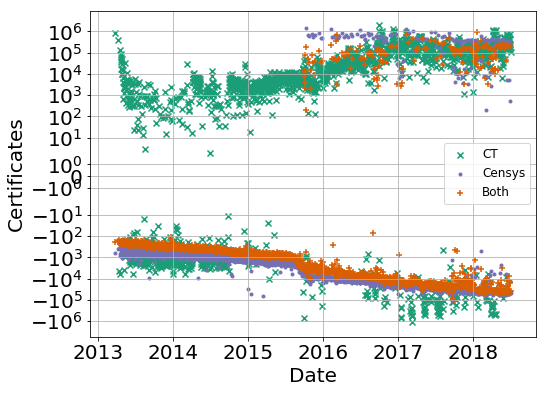

In [131]:
fig_1 = plt.figure(figsize=(WIDTH, HEIGHT))
ax_1 = plt.axes()
MIN_COUNT = 0

def mjf_1(ax, frame, marker, color, label):
    ax.scatter(frame.index, frame, marker=marker, color=color, label=label)
    
mjf_1(ax_1, new_ct - exp_ct, CT_MARKER, NEW_CT_COLOR, 'CT')
mjf_1(ax_1, new_censys - exp_censys, CENSYS_MARKER, NEW_CENSYS_COLOR, 'Censys')
mjf_1(ax_1, new_combined - exp_combined, COMBINED_MARKER, NEW_COMBINED_COLOR, 'Both')

'''
ax.scatter(new_dates, new_ct, marker=CT_MARKER, color=NEW_CT_COLOR)
ax.scatter(new_dates, new_combined, marker=COMBINED_MARKER, color=NEW_COMBINED_COLOR)
ax.scatter(new_dates, new_censys, marker=CENSYS_MARKER, color=NEW_CENSYS_COLOR)
ax.scatter(exp_dates, -exp_ct + exp_combined, marker=CT_MARKER, color=EXP_CT_COLOR)
ax.scatter(exp_dates, -exp_combined, marker=COMBINED_MARKER, color=EXP_COMBINED_COLOR)
ax.scatter(exp_dates, -exp_censys + exp_combined, marker=CENSYS_MARKER, color=EXP_CENSYS_COLOR)
'''
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Certificates')
ax_1.grid(True)
ax_1.set_yscale('symlog')

# Make the legend
LINE_WIDTH = 4
LOCATION = 2  # Upper left
ax_1.legend(ncol=1, fontsize=12)
'''
custom_lines = [
    matplotlib.lines.Line2D([0], [0], color=NEW_CENSYS_COLOR, lw=LINE_WIDTH),
    matplotlib.lines.Line2D([0], [0], color=NEW_COMBINED_COLOR, lw=LINE_WIDTH),
    matplotlib.lines.Line2D([0], [0], color=NEW_CT_COLOR, lw=LINE_WIDTH),
    matplotlib.lines.Line2D([0], [0], color=EXP_CT_COLOR, lw=LINE_WIDTH),
    matplotlib.lines.Line2D([0], [0], color=EXP_COMBINED_COLOR, lw=LINE_WIDTH),
    matplotlib.lines.Line2D([0], [0], color=EXP_CENSYS_COLOR, lw=LINE_WIDTH),
]
ax.legend(custom_lines, [
    'Added (Censys)', 'Added (Both)', 'Added (CT)',
    'Expired (CT)', 'Expired (Both)', 'Expired (Censys)',
], loc=LOCATION)
'''

# Update font sizes
FONT_SIZE=20
matplotlib.rcParams.update({'font.size': FONT_SIZE})

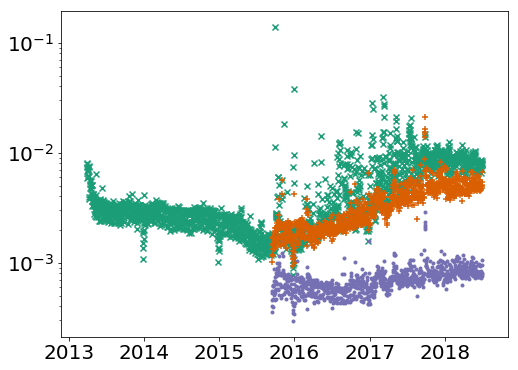

In [136]:
# Base names of relevant data files
CERTS_BASENAME = '20180725.csv'

# Create the full path names by joining the directory to relevant basename
CERTS_PATH = os.path.join(DATA_SUBDIR, CERTS_BASENAME)

df = pd.read_csv(CERTS_PATH, header=0, index_col=0, parse_dates=True)
dates = df.index
censys = df.loc[:, 'censys_certs']
ct = df.loc[:, 'ct_certs']
combined = df.loc[:, 'combined_certs']

exp_fig = plt.figure(figsize=(WIDTH, HEIGHT))
exp_ax = plt.axes()
exp_ax.set_yscale('log')
    
mjf_1(exp_ax, exp_ct / ct, CT_MARKER, NEW_CT_COLOR, 'CT')
mjf_1(exp_ax, exp_censys / censys, CENSYS_MARKER, NEW_CENSYS_COLOR, 'Censys')
mjf_1(exp_ax, exp_combined / combined, COMBINED_MARKER, NEW_COMBINED_COLOR, 'Both')